In [ ]:
import keras
from keras import layers


In [ ]:
# Encoder
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
# Test dataset 
import random as r
k=20
data=np.zeros((k,28,28,1))
for i in range(k):
    data[i,:,:]=x_test[r.randint(0,10000),:,:]


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
              

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.2069 - accuracy: 0.7941 - val_loss: 0.1440 - val_accuracy: 0.8020
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1332 - accuracy: 0.8054 - val_loss: 0.1247 - val_accuracy: 0.8059
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1216 - accuracy: 0.8079 - val_loss: 0.1172 - val_accuracy: 0.8081
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1155 - accuracy: 0.8092 - val_loss: 0.1121 - val_accuracy: 0.8087
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1116 - accuracy: 0.8100 - val_loss: 0.1090 - val_accuracy: 0.8090
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1089 - accuracy: 0.8105 - val_loss: 0.1067 - val_accuracy: 0.8094
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1069 - accuracy: 0.8109 - val_loss: 0.1049 - val_accuracy: 0.8099

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_img=encoder.predict(data)


In [ ]:
encoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           584

In [ ]:
input=keras.layers.Input(shape=encoded_img.shape[1:])
x = autoencoder.layers[-7](input)
x = autoencoder.layers[-6](x)
x = autoencoder.layers[-5](x)
x = autoencoder.layers[-4](x)
x = autoencoder.layers[-3](x)
x = autoencoder.layers[-2](x)
decoded = autoencoder.layers[-1](x)
decoder = keras.Model(input, decoded)

In [ ]:
decoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        116

In [ ]:
encoded_img=encoder.predict(data)
decoded_img=decoder.predict(encoded_img)

In [ ]:
decoded_img.shape

(20, 28, 28, 1)

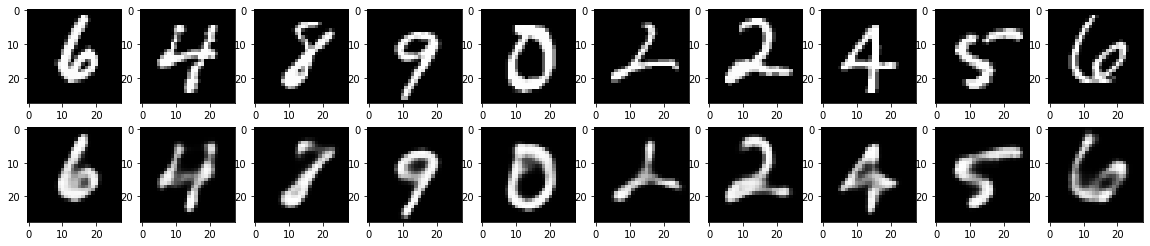

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()

plt.show()


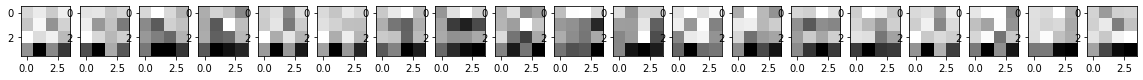

In [ ]:
n = 19
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(encoded_img[i,:,:,1].reshape(4, 4))
    plt.gray()
plt.show()

In [ ]:
# model 2
# Encoder
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (16, 16), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (8, 8), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (4, 4), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(64, (4, 4), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(64,5)(x)
x = layers.Conv2D(32, (8, 8), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32,8)(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.Conv2DTranspose(16,16)(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        4112      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        32800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          3283

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
              

Epoch 1/20
469/469 [==============================] - 17s 32ms/step - loss: 0.2044 - accuracy: 0.7992 - val_loss: 0.1256 - val_accuracy: 0.8087
Epoch 2/20
469/469 [==============================] - 14s 31ms/step - loss: 0.1114 - accuracy: 0.8114 - val_loss: 0.0979 - val_accuracy: 0.8118
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0946 - accuracy: 0.8136 - val_loss: 0.0923 - val_accuracy: 0.8127
Epoch 4/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0878 - accuracy: 0.8143 - val_loss: 0.0849 - val_accuracy: 0.8137
Epoch 5/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0838 - accuracy: 0.8146 - val_loss: 0.0846 - val_accuracy: 0.8132
Epoch 6/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0811 - accuracy: 0.8148 - val_loss: 0.0784 - val_accuracy: 0.8140
Epoch 7/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0792 - accuracy: 0.8149 - val_loss: 0.0773 - val_accuracy:

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs=encoder.predict(data)

In [ ]:
input=keras.layers.Input(shape=encoded_imgs.shape[1:])
x = autoencoder.layers[-7](input)
x = autoencoder.layers[-6](x)
x = autoencoder.layers[-5](x)
x = autoencoder.layers[-4](x)
x = autoencoder.layers[-3](x)
x = autoencoder.layers[-2](x)
decoded = autoencoder.layers[-1](x)
decoder = keras.Model(input, decoded)
decoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 4, 64)]        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)          65600     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 64)         102464    
 nspose)                                                         
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          131104    
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 15, 15, 32)       65568     
 ranspose)                                                       
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 16)        4624

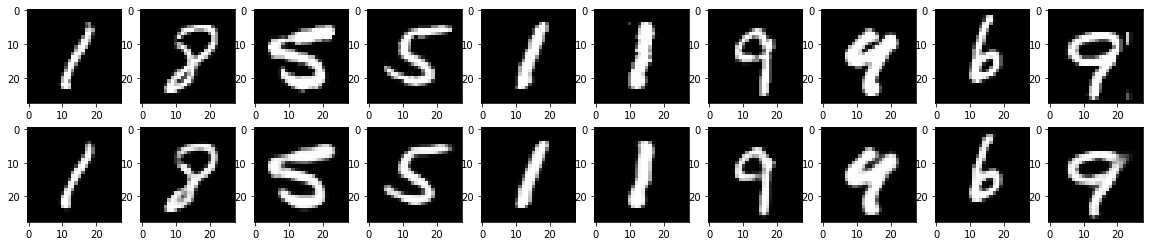

In [ ]:
encoded_img=encoder.predict(data)
decoded_img=decoder.predict(encoded_img)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data[i].reshape(28, 28))
    plt.gray()
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()

plt.show()

(20, 4, 4, 64)